In [79]:
import pandas as pd

data = pd.read_csv('car-sales-extended.csv')
df = pd.DataFrame(data)

median_price = df['Price'].median()
df['Price'] = df['Price'].fillna(median_price)
median_odo = df['Odometer (KM)'].median()
df['Odometer (KM)'] = df['Odometer (KM)'].fillna(median_odo)
median_make = df['Make'].mode()[0]
df['Make'] = df['Make'].fillna(median_make)
median_colour = df['Colour'].mode()[0]
df['Colour'] = df['Colour'].fillna(median_colour)
median_doors = df['Doors'].mode()[0]
df['Doors'] = df['Doors'].fillna(median_doors)

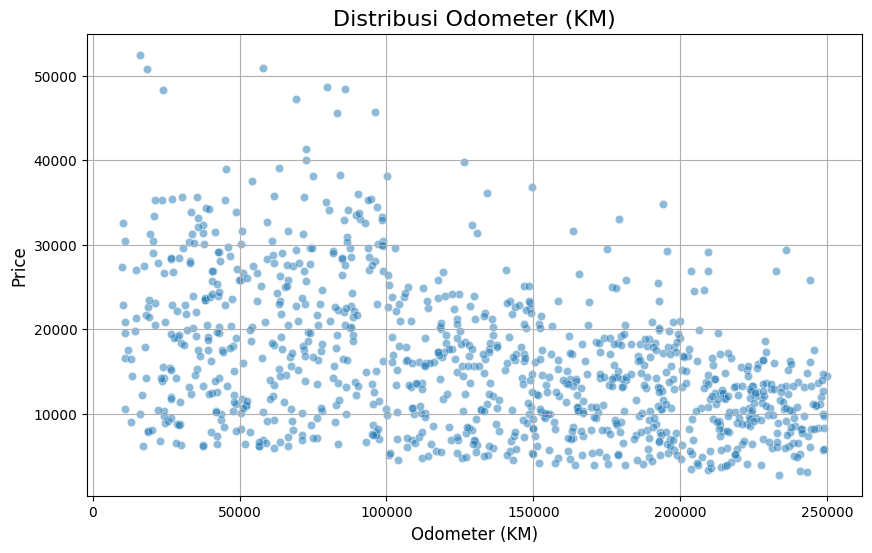

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Odometer (KM)', y='Price', alpha=0.5)
plt.title('Distribusi Odometer (KM)', fontsize=16)
plt.xlabel('Odometer (KM)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)


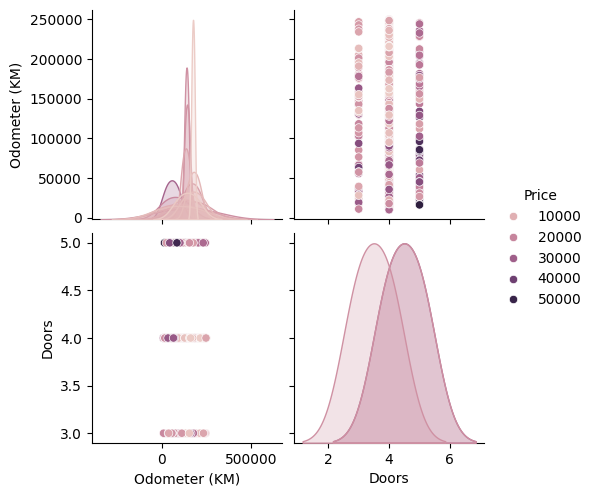

In [ ]:
sns.pairplot(df, hue='Price')
plt.show()

In [82]:
from sklearn.model_selection import train_test_split


df_model = pd.get_dummies(df, columns=['Make', 'Colour'])
x = df_model.drop('Price', axis=1)
y = df_model['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
akurasi_r2 = model.score(x_test, y_test)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) = ${mse:,.2f}")
print(f"R-squared (R2) = {r2:.2f}")

Mean Squared Error (MSE) = $52,279,005.54
R-squared (R2) = 0.43
